# Adaboost

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/adaboost.ipynb)

Adaboost, ou "Adaptive Boosting," est un algorithme de boosting largement utilisé en apprentissage automatique pour améliorer les performances des modèles d'ensemble, principalement des modèles faibles comme les [arbres de décision](./decision-trees.ipynb). La caractéristique distinctive d'Adaboost réside dans son approche adaptative pour attribuer des poids aux exemples d'apprentissage. Il fonctionne en itérant à travers les données d'entraînement, en accordant plus de poids aux exemples mal classés à chaque étape. Cette adaptabilité permet à Adaboost de se concentrer sur les exemples difficiles et de corriger progressivement les erreurs précédentes.

En revanche, le [boosting de gradients](./gradient-boosting.ipynb), généralement associé à des algorithmes comme le Gradient Boosting Machines (GBM), se concentre sur l'optimisation directe de la fonction de coût en ajustant les prédictions du modèle à chaque itération. Contrairement à Adaboost, le boosting de gradients utilise des gradients de la fonction de coût pour ajuster les poids des exemples et minimise directement la perte. Il a tendance à être plus puissant et performant, mais il peut aussi être plus complexe à paramétrer.

En résumé, Adaboost et le boosting de gradients sont deux approches de boosting qui visent à améliorer les modèles d'ensemble, mais ils diffèrent dans leur manière d'attribuer des poids aux exemples et dans leur stratégie d'optimisation. Le boosting de gradients tend à être plus sophistiqué et performant, tandis qu'Adaboost est plus simple et adaptatif.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/AdaBoost)

In [1]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend

## Données

Création d'un jeu de données synthétiques:

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

# Créer les données
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=.9,
    random_state=random_state,
)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Vérifier les dimensions (division 80%-20%)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

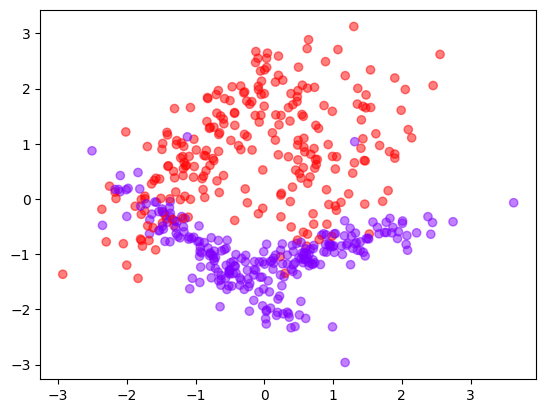

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap='rainbow')

## AdaBoost avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(algorithm="SAMME", n_estimators=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Précision de l'Entraînement:", accuracy_score(y_train, clf.predict(X_train)))
print("Précision du Test:", accuracy_score(y_test, y_pred))

Précision de l'Entraînement: 0.9125
Précision du Test: 0.85


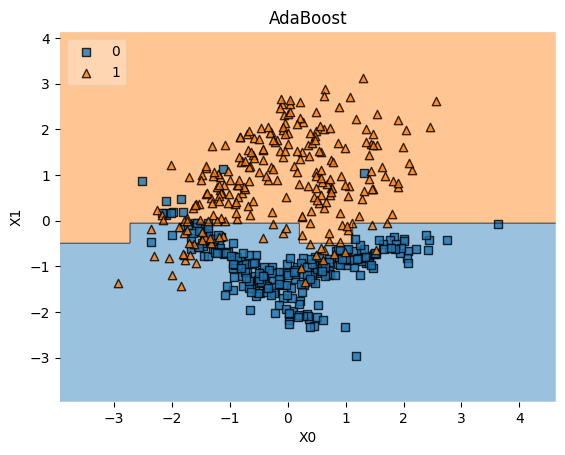

In [5]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('AdaBoost')
plt.show()